# Modeling

In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack
import scipy.sparse as sp
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, mean_squared_error, r2_score, 
                             roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
# Load data
df = pd.read_csv('cleaned_data.csv')
df_reduced = df.drop(['Unnamed: 0'], axis=1)

In [3]:
# Important Columns 
df_main = df_reduced[["URL",
                      "URLSimilarityIndex",
                      "TLDLegitimateProb",
                      "HasObfuscation",
                      "NoOfObfuscatedChar", 
                      "NoOfDegitsInURL",
                        "HasTitle", "HasFavicon",
                        "IsResponsive", "NoOfURLRedirect",
                        "NoOfSelfRedirect",
                        "NoOfPopup",
                        "HasExternalFormSubmit",
                        "HasSocialNet",
                        "HasHiddenFields",
                        "Bank", 
                        "Pay",
                        "Crypto",
                        "HasCopyrightInfo",
                        "label"
                        ]]

Preparing the Data For Modeling


In [4]:
nums = df_reduced.select_dtypes(include=['float64', 'int64'])
nums = nums.drop(['label'], axis=1)

tfidfvectorizer = TfidfVectorizer()
title_features = tfidfvectorizer.fit_transform(df_main['URL'])

scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(nums)
final_features = hstack([title_features, scaled_numeric_features])

X_train, X_test, y_train, y_test = train_test_split(final_features, df_main["label"], test_size=0.3, random_state=42)

### Model 1: Logistic Regression

In [5]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, Confusion Matrix: {cm_log_reg}")

Logistic Regression Accuracy: 0.999657651489216, Precision: 0.999407231772377, Recall: 1.0, F1 Score: 0.9997035280166024, Confusion Matrix: [[3702    3]
 [   0 5058]]


The model shows excellent performance, with an accuracy of 99.97%, indicating nearly all predictions were correct. High precision (99.94%) and perfect recall (100%) mean the model rarely makes mistakes in classifying the websites, with only 3 false positives and no false negatives. The F1 score of 99.97% confirms a strong balance between precision and recall. Overall, this model reliably and accurately identifies the websites with minimal error.

### Model 2: Decision Tree

In [6]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, Confusion Matrix: {cm_dt}")

Decision Tree Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0, Confusion Matrix: [[3705    0]
 [   0 5058]]


The Decision Tree model achieves perfect accuracy, precision, recall, and F1 score (all at 1.0) in identifying phishing websites, with no classification errors according to the confusion matrix. While this suggests excellent performance, it also raises concerns about overfitting.

### Model 3: Random Forest


In [7]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, Confusion Matrix: {cm_rf}")

Random Forest Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0, Confusion Matrix: [[3705    0]
 [   0 5058]]


The Random Forest model, like the Decision Tree, shows perfect accuracy, precision, recall, and F1 score (all 1.0) in detecting phishing websites, correctly classifying all cases with no errors in the confusion matrix. While this indicates strong performance, it also suggests potential overfitting

### Model 4: XGBoost

XGBoost Classifier Accuracy: 0.9998858838297386, Precision: 0.9998023324767741, Recall: 1.0, F1 Score: 0.9999011564693091, Confusion Matrix: [[3704    1]
 [   0 5058]]


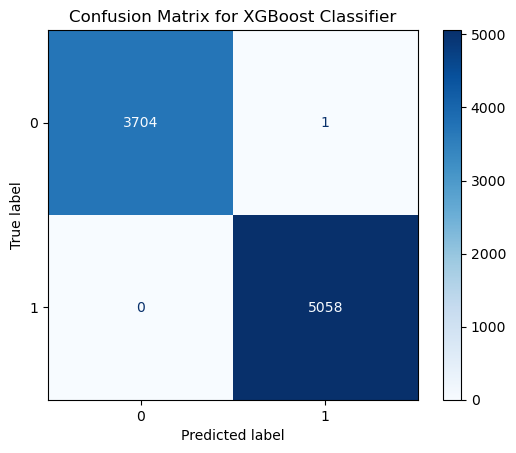

In [8]:
# Train the XGBoost Classifier
xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

# Evaluation for XGBoost Classifier
y_pred_xgb = xgb_class.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, Confusion Matrix: {cm_xgb}")
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

The XGBoost model achieves an exceptionally high performance with an accuracy of 99.99%, precision of 99.98%, recall of 100%, and an F1 score of 99.99% for phishing website detection. The confusion matrix shows only one false positive and no false negatives, meaning the model rarely misclassifies phishing or legitimate websites. Unlike models with perfect scores, XGBoost's results suggest excellent predictive accuracy without signs of overfitting, as the minor misclassification indicates some generalization capability. This balance makes XGBoost a strong, reliable option for this task.

### Model 5: LightGBM

In [9]:
baseline_params = {
    'objective': 'binary', 
    'metric': 'binary_logloss',  
    'boosting_type': 'gbdt', 
    'verbose': -1 

}

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


# Train the model
model = lgb.train(baseline_params, train_data, num_boost_round=100)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Baseline Accuracy: {accuracy}")
print(f"Baseline ROC-AUC: {roc_auc}")

Baseline Accuracy: 1.0
Baseline ROC-AUC: 1.0


The baseline LightGBM model achieved an accuracy and ROC-AUC of 1.0 suggests that the model perfectly distinguishes between phishing and legitimate websites. However, such perfect scores in both accuracy and ROC-AUC can be a red flag for overfitting,

###  DNN using TensorFlow

The DNN was selected due to its ability to learn complex patterns in high-dimensional data while utilizing regularization techniques like dropout and batch normalization to reduce overfitting. Unlike decision trees and ensemble models like random forests and XGBoost, which can easily overfit, the DNN offers flexibility in hyperparameter tuning and employs early stopping to monitor validation loss, ensuring effective generalization on unseen data.

In [10]:

model = Sequential([
    # Input Layer + First Hidden Layer
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    # Second Hidden Layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Third Hidden Layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output Layer
    Dense(1, activation='sigmoid')  # Binary classification (phishing or not)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    batch_size=32,
                    callbacks=[early_stopping])

# Evaluate on validation set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test set
y_val_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict(X_test)))


c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
639/639 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9993 - val_loss: 0.0086
Epoch 2/5
639/639 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.9910 - loss: 0.0864 - val_accuracy: 0.9998 - val_loss: 0.0027
Epoch 3/5
639/639 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.9963 - loss: 0.0221 - val_accuracy: 0.9986 - val_loss: 0.0085
Epoch 4/5
639/639 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.9941 - loss: 0.0679 - val_accuracy: 0.9994 - val_loss: 0.0073
Epoch 5/5
639/639 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - accuracy: 0.9978 - loss: 0.0175 - val_accuracy: 0.9997 - val_loss: 0.0070
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 0.0023
Test Accuracy: 0.9998
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3705
           1       1.00      1.00      1.00      5058

    accuracy                           1.00      8763

The DNN sequential model is created with three hidden layers using ReLU activation functions, followed by Batch Normalization and Dropout layers to improve training stability and prevent overfitting. The output layer uses a sigmoid activation function for binary classification.Early Stopping was used to avoid overfitting.
The model excels in detecting phishing websites, achieving an ROC-AUC score of 0.99 and perfect precision, recall, and F1 scores of 1.00 for both classes. With a 100% accuracy on the test set and support values of 3705 for legitimate sites and 5058 for phishing sites, the results indicate excellent generalization.